In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/vera0519/vera_911')
from src.cities.new_orleans import NewOrleans
from src.cities.seattle import Seattle
from src.cities.dallas import Dallas
from src.cities.detroit import Detroit
from src.cities.charleston import Charleston
import pandas as pd 
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/vera0519/vera_911')
import pandas as pd
# import cenpy
import src.features.call_types as call_types
from src.cities.new_orleans import NewOrleans
from src.cities.seattle import Seattle
from src.cities.dallas import Dallas
from src.cities.detroit import Detroit
from src.cities.charleston import Charleston
import matplotlib.pyplot as plt
import src.features.geo as Geo
from src.features.call_types import load_call_mappings, assign_disposition, process
import src.visualization.visualize as vis
%matplotlib inline

In [33]:
import pandas as pd 
import geopandas as gp
import matplotlib.pyplot as plt 
import seaborn as sns
import math 
#from ..utils import VIS_DIR

In [9]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [151]:
def plot_call_volme_by_CFS_by_self_initiated(city, call_type=None, ax=None):
    try:
        if(not ax):
            fig = plt.figure()
            ax = fig.add_subplot(111)
        
        if (call_type == None) :
            data = city.clean_data().groupby(['year', 'self_initiated']).count().reset_index()
            data[['year']] = data[['year']].astype(int)
            data = data.pivot_table(index='year', columns='self_initiated', values='index')
        else :
            data = city.clean_data().groupby(['year', 'self_initiated', 'call_type']).count().reset_index()
            data[['year']] = data[['year']].astype(int)
            data = data.pivot_table(index=['call_type', 'year'], columns='self_initiated', values='index').loc[call_type]
        if (city.name() == 'Charleston' or city.name() == 'Dallas') :
            data = data.assign(unknown = lambda x :  x.unknown/1000)
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#D1D4C9'])
            ax.legend(['N/A'],loc='lower right')
        if (city.name() == 'NewOrleans') :
            data = data.assign(No = lambda x :  x.No/1000, Yes = lambda x :  x.Yes/1000, other = lambda x :  x.other/1000 )
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#159BA3','#F9BA16','#D1D4C9'])
            ax.legend(['Non self initiated', 'Self initiated','N/A'],loc='lower left')
        if (city.name() == 'Detroit' or city.name() == 'Seattle') :
            data = data.assign(No = lambda x :  x.No/1000, Yes = lambda x :  x.Yes/1000 )
            data.plot(kind='barh', stacked=True, label='Self Initiated',ax=ax, colors=['#159BA3','#F9BA16','#D1D4C9'])
            ax.legend(['Non self initiated', 'Self initiated','N/A'],loc='lower right')
        ax.set_xlabel('Number of Calls (thousands)')
        ax.set_ylabel('')
        ax.set_title('Number of calls - '+ ('all CFS types' if call_type == None else call_type))
    except:
        show_no_self_initiated_error(ax)
    
    return ax

CFS_codes = [None, 'Accidents/Traffic Safety', 'Alarms', 'Assisting the Public',  'Behavioral Health', 'Call Related Issues', 
'Callback', 'Complaints/Environmental Conditions', 'Domestic Violence', 'Drugs', 'Fire', 'Liquor Violations', 
'Medical Emergencies',  'Missing Persons', 'Officer Needs Help', 'Other (Not Crime)', 'Other Crimes', 'Property Crime',  
'Sex Offenses', 'Status Offenses', 'Statuses', 'Suspicion', 'Training Academy', 'Violent Crime', 'Warrants', 'other']

In [156]:
city = Detroit()

NameError: name 'show_no_self_initiated_error' is not defined

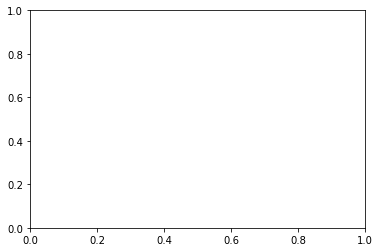

In [157]:
plot_call_volme_by_CFS_by_self_initiated(city, call_type = CFS_codes[0])

In [2]:
%load_ext autoreload
%autoreload 2
import geopandas as gp
import pandas as pd 
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import logging
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
#from geo_reference import get_city_dir, load_calls_for_city, generate_points_city,rename_positional_columns,assign_point_to_census_tract,load_tracts_for_city
#from shapely.geometry import Point


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
SeattleCalls = load_calls_for_city("Seattle")
callCounts = SeattleCalls.groupby('Initial Call Type').agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Initial Call Type', 'index']]

,Initial Call Type,index
205,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",374732
246,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",238298
262,TRAFFIC STOP - OFFICER INITIATED ONVIEW,234406
196,PARKING VIOLATION (EXCEPT ABANDONED CAR),194824
123,"DISTURBANCE, MISCELLANEOUS/OTHER",189601
247,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,158595
250,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),104899
120,DIRECTED PATROL ACTIVITY,103377
138,FOLLOW UP,79787
187,OFF DUTY EMPLOYMENT,76882


In [19]:
SeattleCalls = load_calls_for_city("Seattle")
callCounts = SeattleCalls.groupby('Final Call Type').agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Final Call Type', 'index']]

,Final Call Type,index
104,--PREMISE CHECKS - CRIME PREVENTION,352107
124,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,323796
47,--DISTURBANCE - OTHER,277712
136,--TRAFFIC - MOVING VIOLATION,225125
138,--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),202325
137,--TRAFFIC - MV COLLISION INVESTIGATION,176110
21,--ASSIST PUBLIC - OTHER (NON-SPECIFIED),143145
125,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,97118
114,--PROWLER - TRESPASS,89078
37,--CRISIS COMPLAINT - GENERAL,86191


In [23]:
calls = load_calls_for_city("Detroit")
calls.head()
callCounts = calls.groupby(['Call Description', 'Category']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Call Description', 'Category', 'index']]

,Call Description,Category,index
232,TRAFFIC STOP,TRF STOP,254545
218,SPECIAL ATTENTION,SPCL ATT,254541
82,DISTURBANCE,DISTURB,131786
191,REMARKS,REMARKS,81946
221,START OF SHIFT INFORMATION,STRTSHFT,81916
125,INVESTIGATE PERSON,INVPERS,75962
240,UNKNOWN PROBLEM,UNKPROB,67878
18,ASSAULT AND BATTERY,AB,66785
230,TOWING DETAIL,TOW,56500
100,FELONIOUS ASSAULT IP,FA IP,36910


In [25]:
calls = load_calls_for_city("Dallas")
calls.head()
callCounts = calls.groupby(['Call (911) Problem']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Call (911) Problem', 'index']]

,Call (911) Problem,index
80,58 - ROUTINE INVESTIGATION,62689
15,11V - BURG MOTOR VEH,57997
86,6X - MAJOR DIST (VIOLENCE),40084
13,11R - BURG OF RES,32650
7,09V - UUMV,28866
5,09 - THEFT,24570
51,31 - CRIMINAL MISCHIEF,23261
63,40/01 - OTHER,22087
62,40 - OTHER,18245
33,20 - ROBBERY,17197


In [26]:
calls = load_calls_for_city("Dallas")
calls.head()
callCounts = calls.groupby(['Type of Incident']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Type of Incident', 'index']]

,Type of Incident,index
70,BMV,60074
898,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,26339
87,BURGLARY OF HABITATION - FORCED ENTRY,22111
250,FOUND PROPERTY (NO OFFENSE),19748
475,PUBLIC INTOXICATION,17172
130,CRIM MISCHIEF >OR EQUAL $100 BUT <$750,16858
84,BURGLARY OF BUILDING - FORCED ENTRY,15253
0,ABANDONED PROPERTY (NO OFFENSE),14679
492,ROBBERY OF INDIVIDUAL (AGG),13243
60,ASSAULT -OFFENSIVE CONTACT,11551


In [28]:
calls = load_calls_for_city("NewOrleans")
calls.head()
##callCounts = calls.groupby(['Call (911) Problem']).agg('count').reset_index()
##callCounts.sort_values('index', ascending = False)[['Call (911) Problem', 'index']]

,index,(ALTERNATE) - Neighborhood Statistical Areas,BLOCK_ADDRESS,Beat,Blocks,Census - 2010,Council Districts,Disposition,DispositionText,InitialPriority,InitialType,InitialTypeText,Location,MapX,MapY,NOPD_Item,Neighborhood Organizations,Police Districts,PoliceDistrict,Priority,Self-Reported Neighborhood Organizations (SRNOs) Boundaries,SelfInitiated,TimeArrive,TimeClosed,TimeCreate,TimeDispatch,Type,TypeText,Zip,Zip Codes
0,0,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000111,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:03,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
1,1,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000211,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
2,2,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000311,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
3,3,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000411,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
4,4,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000511,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:05,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0


In [31]:
calls = load_calls_for_city("NewOrleans")
calls.head()
callCounts = calls.groupby(['TypeText']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['TypeText', 'index']]

,TypeText,index
66,COMPLAINT OTHER,868116
260,TRAFFIC INCIDENT,349729
95,DISTURBANCE (OTHER),289259
53,"BURGLAR ALARM, SILENT",222490
257,TRAFFIC INCIDENT,180101
244,SUSPICIOUS PERSON,176241
39,AUTO ACCIDENT,133391
52,"BURGLAR ALARM, SILEN",125381
31,AREA CHECK,95107
97,DOMESTIC DISTURBANCE,76012


In [5]:
calls = load_calls_for_city("Seattle")
calls.head()
#callCounts = calls.groupby(['Event Clearance Description']).agg('count').reset_index()
#callCounts.sort_values('index', ascending = False)[['Event Clearance Description', 'index']]
callCounts = calls.groupby(['Call Type']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['Call Type', 'index']]

,Call Type,index
5,ONVIEW,1588291
0,911,1316124
9,"TELEPHONE OTHER, NOT 911",904766
1,ALARM CALL (NOT POLICE ALARM),113438
6,POLICE (VARDA) ALARM,157
3,HISTORY CALL (RETRO),91
4,IN PERSON COMPLAINT,69
10,TEXT MESSAGE,49
7,PROACTIVE (OFFICER INITIATED),47
8,SCHEDULED EVENT (RECURRING),34


In [20]:
calls = load_calls_for_city("Dallas")
calls.head()
#callCounts = calls.groupby(['Offense Status']).agg('count').reset_index()
#callCounts.sort_values('index', ascending = False)[['Offense Status', 'index']]
callCounts = calls.groupby(['UCR Disposition']).agg('count').reset_index()
callCounts.sort_values('index', ascending = False)[['UCR Disposition', 'index']]
##callCounts = calls.groupby(['Call Type']).agg('count').reset_index()
##callCounts.sort_values('index', ascending = False)[['Call Type', 'index']]

,UCR Disposition,index
10,Suspended,424085
1,CBA (Over Age 17),71194
4,CBEA (Over Age 17),15078
7,Open,10898
6,Closed,6036
0,CBA (Age 17),4957
3,CBEA (Age 17),545
5,CBEA (Under Age 17),219
2,CBA (Under 17),216
9,S,14


In [21]:
calls = load_calls_for_city("Detroit")
calls.head()
#callCounts = calls.groupby(['Officer Initiated']).agg('count').reset_index()
#callCounts.sort_values('index', ascending = False)[['Officer Initiated', 'index']]


,index,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,Precinct/Scout Car Area,Responding Unit,Officer Initiated,Intake Time,Dispatch Time,Travel Time,Total Response Time,Time On Scene,Total Time,Neighborhood,Census Block GEOID,Council District,Longitude,Latitude,Incident Location,Hardest Hit Fund Areas,City Council Districts,Detroit Neighborhoods,Scout Car Areas,Counties,Zip Codes
0,0,201910604757,DPD,7300 block of W 7 MILE RD,48221,3.0,875030,HANGUP CALLS,HNGUP,2019-04-16 11:59:50,11:59:50 PM,123B,None,No,0.8,NaN,NaN,NaN,NaN,NaN,Bagley,2.616354e+14,2.0,-83.145468,42.431519,"location\n(42.43152, -83.14547)",15.0,2.0,39.0,118.0,1345.0,19615.0
1,1,201910604754,DPD,7100 block of W 7 MILE RD,48221,3.0,SA,SPECIAL ATTENTION,SPCL ATT,2019-04-16 11:58:48,11:58:48 PM,123B,,Yes,0.0,0.0,0.0,0.0,7.4,7.4,Bagley,2.616354e+14,2.0,-83.143673,42.431975,"location\n(42.43198, -83.14367)",15.0,2.0,39.0,118.0,1345.0,19615.0
2,2,201910604753,DPD,15300 block of BRAILE ST,48223,3.0,875030,HANGUP CALLS,HNGUP,2019-04-16 11:58:35,11:58:35 PM,810B,None,No,1.2,NaN,NaN,NaN,NaN,NaN,Brightmoor,2.616354e+14,1.0,-83.244911,42.401169,"location\n(42.40117, -83.24491)",NaN,1.0,49.0,59.0,1345.0,19616.0
3,3,201910604751,DPD,15300 block of BRAILE ST,48223,3.0,875030,HANGUP CALLS,HNGUP,2019-04-16 11:57:26,11:57:26 PM,810B,None,No,0.4,NaN,NaN,NaN,NaN,NaN,Brightmoor,2.616354e+14,1.0,-83.244911,42.401169,"location\n(42.40117, -83.24491)",NaN,1.0,49.0,59.0,1345.0,19616.0
4,4,201910604750,DPD,3700 block of DEVONSHIRE RD,48224,3.0,825030,DISTURBANCE,DISTURB,2019-04-16 11:56:57,11:56:57 PM,56B,None,No,2.8,NaN,NaN,NaN,NaN,NaN,Morningside,2.616350e+14,4.0,-82.935848,42.392520,"location\n(42.39252, -82.93585)",9.0,4.0,6.0,29.0,1345.0,19617.0


In [18]:
calls = load_calls_for_city("NewOrleans")
calls.head()
#callCounts = calls.groupby(['SelfInitiated']).agg('count').reset_index()
#callCounts.sort_values('index', ascending = False)[['SelfInitiated', 'index']]
#callCounts = calls.groupby(['DispositionText']).agg('count').reset_index()
#callCounts.sort_values('index', ascending = False)[['DispositionText', 'index']]


,index,(ALTERNATE) - Neighborhood Statistical Areas,BLOCK_ADDRESS,Beat,Blocks,Census - 2010,Council Districts,Disposition,DispositionText,InitialPriority,InitialType,InitialTypeText,Location,MapX,MapY,NOPD_Item,Neighborhood Organizations,Police Districts,PoliceDistrict,Priority,Self-Reported Neighborhood Organizations (SRNOs) Boundaries,SelfInitiated,TimeArrive,TimeClosed,TimeCreate,TimeDispatch,Type,TypeText,Zip,Zip Codes
0,0,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000111,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:03,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
1,1,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000211,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
2,2,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000311,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
3,3,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000411,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:04,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
4,4,47.0,007XX S Dupre St,None,11739.0,11739.0,2.0,NAT,NECESSARY ACTION TAKEN,None,None,None,"(29.961547427695, -90.094557283621)",3673089.0,533629.0,A0000511,109.0,6.0,1,1F,109.0,None,NaT,2011-01-01 12:00:05,2011-01-01 12:00:02,None,17M,MUNICIPAL ATTTACHME,70119,3768.0
